# Data preparation

### Import and review data:



In [19]:
!pip install pandas
import pandas as pd


In [20]:
#import csv file (from local machine)

data = pd.read_csv("C:/Users/Andrea/Documents/CIND 820/WELFake_Dataset.csv")

In [21]:
#check first 5 rows

pd.set_option('max_colwidth', None)
data.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                       title  \
0         LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                        NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]   
3                                  Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid   
4                                            SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [22]:
#check class counts

data.label.value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [23]:
#check for null values

data.isnull().sum()


Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [24]:
#drop null values

data = data.dropna()

In [25]:
#check for duplicate titles

data['title'].duplicated().sum()

9229

In [26]:
#check for duplicate text

data['text'].duplicated().sum()

9337

In [27]:
#remove duplicates, leaving the first instance

data = data.drop_duplicates(subset=['title'], keep='first')
data = data.drop_duplicates(subset=['text'], keep='first')

In [28]:
#new data counts after dropping null values and duplicates

data.label.value_counts()

label
0    34237
1    27156
Name: count, dtype: int64

Text(0.5, 0, 'Class')

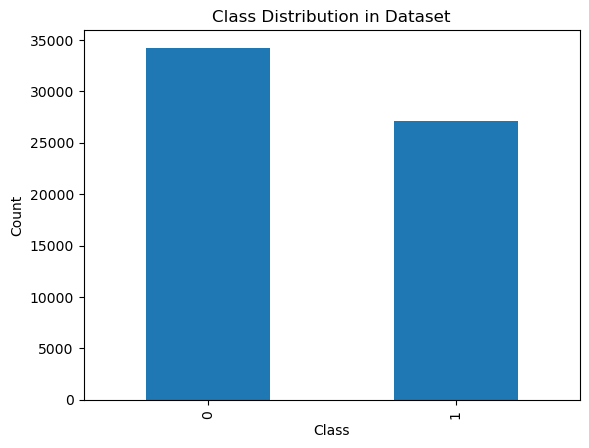

In [29]:
#plot class counts

!pip install matplotlib

import matplotlib.pyplot as plot

data.label.value_counts().plot.bar()
plot.title("Class Distribution in Dataset")
plot.ylabel("Count")
plot.xlabel("Class")

### Clean the data:

In [30]:
!pip install nltk
import nltk

In [31]:
#make new copy of data frame to clean

cleandata = data.copy()

In [32]:
#change all text to lowercase

cleandata['title'] = cleandata['title'].str.lower()
cleandata['text'] = cleandata['text'].str.lower()

In [33]:
#remove urls

cleandata['title'] = cleandata['title'].str.replace(r'https?:\/\/\S+', '', regex=True)
cleandata['text'] = cleandata['text'].str.replace(r'https?:\/\/\S+', '', regex=True)

In [34]:
#install package to detect langauges

!pip install langdetect

from langdetect import detect, DetectorFactory

In [35]:
#create function to add a column to the dataframe indicating the language of the text and title

def detect_lang(x):
    DetectorFactory.seed = 42
    try:
        lang = detect(x)
    except:
        lang = 'other'
    return lang

In [36]:
#add columns using function

cleandata['text_lang'] =cleandata['text'].apply(detect_lang)

In [37]:
cleandata['title_lang'] =cleandata['title'].apply(detect_lang)

In [38]:
#check how many rows are not in english

sum(cleandata['text_lang']!='en')

560

In [39]:
sum(cleandata['title_lang']!='en')

2724

In [40]:
#drop any rows with non-English text

cleandata.drop(cleandata[(cleandata['text_lang']!='en') | (cleandata['title_lang']!='en')].index, inplace=True)


In [41]:
#check results

sum(cleandata['text_lang']!='en')

0

In [42]:
sum(cleandata['text_lang']!='en')

0

In [43]:
#install package to expand contractions

!pip install contractions

import contractions

In [44]:
#expand contractions

cleandata['title'] = cleandata['title'].apply(lambda x: [contractions.fix(word) for word in str(x).split()])
cleandata['text'] = cleandata['text'].apply(lambda x: [contractions.fix(word) for word in str(x).split()])

In [45]:
#remove punctation and numbers, except for hyphens in compound words

cleandata['title'] = cleandata['title'].astype(str)
cleandata['text'] = cleandata['text'].astype(str)

cleandata['title'] = cleandata['title'].str.replace('[^A-Za-z](?<![A-Za-z]-(?=[A-Za-z]))', ' ', regex=True)
cleandata['text'] = cleandata['text'].str.replace('[^A-Za-z](?<![A-Za-z]-(?=[A-Za-z]))', ' ', regex=True)

In [46]:
#check the results of cleaning

cleandata.head()

Unnamed: 0  \
0           0   
2           2   
3           3   
4           4   
5           5   

                                                                                                                                                                                              title  \
0           law    enforcement    on    high    alert    following    threats    against    cops    and    whites    on        by     blacklivesmatter    and     fyf       terrorists     video      
2    unbelievable     obama s    attorney    general    says    most    charlotte    rioters    were     peaceful     protesters in    her    home    state    of    north    carolina     video      
3                                          bobby    jindal     raised    hindu     uses    story    of    christian    conversion    to    woo    evangelicals    for    potential            bid     
4                                                    satan          russia    unvelis    an    image    of    its    terrifying    new     supernuke          western    world    takes    notice     
5                                                                              about    time     christian    group    sues    amazon    and    splc    for    designation    as    hate    group     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [47]:
#tokenize the text (separate sentences into individual words)

from nltk.tokenize import word_tokenize

In [48]:
cleandata['text'] = cleandata['text'].apply(word_tokenize)
cleandata['title'] = cleandata['title'].apply(word_tokenize)

In [49]:
#remove stop words

from nltk.corpus import stopwords

stopwords = stopwords.words('english')

cleandata['title'] = cleandata['title'].apply(lambda words: [word for word in words if word not in stopwords])
cleandata['text'] = cleandata['text'].apply(lambda words: [word for word in words if word not in stopwords])

In [50]:
#review results of tokenization

pd.set_option('max_colwidth', None)

cleandata.head()

,Unnamed: 0,title,text,label,text_lang,title_lang
0,0,"[law, enforcement, high, alert, following, threats, cops, whites, blacklivesmatter, fyf, terrorists, video]","[comment, expected, barack, obama, members, fyf, fukyoflag, blacklivesmatter, movements, called, lynching, hanging, white, people, cops, encouraged, others, radio, show, tuesday, night, turn, tide, kill, white, people, cops, send, message, killing, black, people, america, one, f, yoflag, organizers, called, sunshine, radio, blog, show, hosted, texas, called, sunshine, f, ing, opinion, radio, show, snapshot, fyf, lolatwhitefear, twitter, page, p, shows, urging, supporters, call, fyf, tonight, continue, dismantle, illusion, white, snapshot, twitter, radio, call, invite, fyf, radio, show, aired, p, eastern, standard, time, show, callers, clearly, call, lynching, killing, white, people, minute, clip, radio, show, heard, provided, breitbart, texas, someone, would, like, referred, ...]",1,en,en
2,2,"[unbelievable, obama, attorney, general, says, charlotte, rioters, peaceful, protesters, home, state, north, carolina, video]","[demonstrators, gathered, last, night, exercising, constitutional, protected, right, peaceful, protest, order, raise, issues, create, change, loretta, lynch, aka, eric, holder, skirt]",1,en,en
3,3,"[bobby, jindal, raised, hindu, uses, story, christian, conversion, woo, evangelicals, potential, bid]","[dozen, politically, active, pastors, came, private, dinner, friday, night, hear, conversion, story, unique, context, presidential, politics, louisiana, gov, bobby, jindal, traveled, hinduism, protestant, christianity, ultimately, became, calls, evangelical, catholic, two, hours, jindal, recalled, talking, girl, high, school, wanted, save, soul, reading, bible, closet, parents, would, see, feeling, stir, watching, movie, senior, year, depicted, jesus, cross, struck, struck, hard, jindal, told, pastors, son, god, died, sins, jindal, session, christian, clergy, lead, congregations, early, presidential, battleground, states, iowa, south, carolina, part, behind-the-scenes, effort, louisiana, governor, find, political, base, could, help, propel, top, tier, republican, candidates, seeking, run, white, house, known, gop, circles, ...]",0,en,en
4,4,"[satan, russia, unvelis, image, terrifying, new, supernuke, western, world, takes, notice]","[rs, sarmat, missile, dubbed, satan, replace, ss, flies, miles, km, per, sec, range, miles, km, weapons, perceived, part, increasingly, aggressive, russia, could, deliver, warhead, megatons, times, powerful, atom, bombs, dropped, hiroshima, nagasaki, libby, plummer, gareth, davie, russia, unveiled, chilling, pictures, largest, ever, nuclear, missile, capable, destroying, area, size, france, rs, sarmat, missile, dubbed, satan, nato, top, speed, miles, km, per, second, designed, outfox, anti-missile, shield, systems, new, sarmat, missile, could, deliver, warheads, megatons, times, powerful, atom, bombs, dropped, hiroshima, nagasaki, scroll, video, russian, president, vladimir, putin, reportedly, planning, replace, country, older, ss, satan, weapons, new, missiles, amid, string, recent, disagreements, ...]",1,en,en
5,5,"[time, christian, group, sues, amazon, splc, designation, hate, group]","[say, one, time, someone, sued, southern, poverty, law, center, tuesday, james, kennedy, ministries, djkm, filed, lawsuit, southern, poverty, law, center, splc, charity, navigation, organization, guidestar, amazon, defamation, religious, discrimination, trafficking, falsehood, splc, listed, djkm, hate, group, guidestar, also, categorized, terms, amazon, kept, ministry, charity, donation, program, amazon, smile, embarked, today, journey, right, terrible, wrong, dr, frank, wright, president, ceo, djkm, said, statement, tuesday, knowingly, label, christian, ministries, hate, groups, solely, subscribing, historic, christian, faith, either, woefully, uninformed, willfully, deceitful, case, southern, poverty, law, center, lawsuit, alleges, latter,

### Lemmatize the data:

In [51]:
#create copy of data frame prior to lemmatization and prepare function

lemmdata = cleandata.copy()

from nltk.stem import WordNetLemmatizer

lemmatize = WordNetLemmatizer()

In [52]:
lemmdata['title'] = lemmdata['title'].apply(lambda lst:[lemmatize.lemmatize(word) for word in lst])

In [53]:
lemmdata['title'] = lemmdata['title'].apply(lambda lst:[lemmatize.lemmatize(word, pos='v') for word in lst])

In [54]:
lemmdata['text'] = lemmdata['text'].apply(lambda lst:[lemmatize.lemmatize(word) for word in lst])

In [55]:
lemmdata['text'] = lemmdata['text'].apply(lambda lst:[lemmatize.lemmatize(word, pos='v') for word in lst])

In [56]:
#review results of lemmatization

lemmdata.head()

,Unnamed: 0,title,text,label,text_lang,title_lang
0,0,"[law, enforcement, high, alert, follow, threat, cop, white, blacklivesmatter, fyf, terrorist, video]","[comment, expect, barack, obama, member, fyf, fukyoflag, blacklivesmatter, movement, call, lynch, hang, white, people, cop, encourage, others, radio, show, tuesday, night, turn, tide, kill, white, people, cop, send, message, kill, black, people, america, one, f, yoflag, organizer, call, sunshine, radio, blog, show, host, texas, call, sunshine, f, ing, opinion, radio, show, snapshot, fyf, lolatwhitefear, twitter, page, p, show, urge, supporter, call, fyf, tonight, continue, dismantle, illusion, white, snapshot, twitter, radio, call, invite, fyf, radio, show, air, p, eastern, standard, time, show, caller, clearly, call, lynch, kill, white, people, minute, clip, radio, show, hear, provide, breitbart, texas, someone, would, like, refer, ...]",1,en,en
2,2,"[unbelievable, obama, attorney, general, say, charlotte, rioter, peaceful, protester, home, state, north, carolina, video]","[demonstrator, gather, last, night, exercise, constitutional, protect, right, peaceful, protest, order, raise, issue, create, change, loretta, lynch, aka, eric, holder, skirt]",1,en,en
3,3,"[bobby, jindal, raise, hindu, us, story, christian, conversion, woo, evangelicals, potential, bid]","[dozen, politically, active, pastor, come, private, dinner, friday, night, hear, conversion, story, unique, context, presidential, politics, louisiana, gov, bobby, jindal, travel, hinduism, protestant, christianity, ultimately, become, call, evangelical, catholic, two, hour, jindal, recall, talk, girl, high, school, want, save, soul, read, bible, closet, parent, would, see, feel, stir, watch, movie, senior, year, depict, jesus, cross, strike, strike, hard, jindal, tell, pastor, son, god, die, sin, jindal, session, christian, clergy, lead, congregation, early, presidential, battleground, state, iowa, south, carolina, part, behind-the-scenes, effort, louisiana, governor, find, political, base, could, help, propel, top, tier, republican, candidate, seek, run, white, house, know, gop, circle, ...]",0,en,en
4,4,"[satan, russia, unvelis, image, terrify, new, supernuke, western, world, take, notice]","[r, sarmat, missile, dub, satan, replace, s, fly, mile, km, per, sec, range, mile, km, weapon, perceive, part, increasingly, aggressive, russia, could, deliver, warhead, megaton, time, powerful, atom, bomb, drop, hiroshima, nagasaki, libby, plummer, gareth, davie, russia, unveil, chill, picture, largest, ever, nuclear, missile, capable, destroy, area, size, france, r, sarmat, missile, dub, satan, nato, top, speed, mile, km, per, second, design, outfox, anti-missile, shield, system, new, sarmat, missile, could, deliver, warhead, megaton, time, powerful, atom, bomb, drop, hiroshima, nagasaki, scroll, video, russian, president, vladimir, putin, reportedly, plan, replace, country, older, s, satan, weapon, new, missile, amid, string, recent, disagreement, ...]",1,en,en
5,5,"[time, christian, group, sue, amazon, splc, designation, hate, group]","[say, one, time, someone, sue, southern, poverty, law, center, tuesday, jam, kennedy, ministry, djkm, file, lawsuit, southern, poverty, law, center, splc, charity, navigation, organization, guidestar, amazon, defamation, religious, discrimination, traffic, falsehood, splc, list, djkm, hate, group, guidestar, also, categorize, term, amazon, keep, ministry, charity, donation, program, amazon, smile, embark, today, journey, right, terrible, wrong, dr, frank, wright, president, ceo, djkm, say, statement, tuesday, knowingly, label, christian, ministry, hate, group, solely, subscribe, historic, christian, faith, either, woefully, uninformed, willfully, deceitful, case, southern, poverty, law, center, lawsuit, allege, latter, splc, label, djkm, anti-lgbt, hate, group, opposition, same-sex, marriage, transgenderism, false, illegal, characterization, ...]",1,en,en


In [57]:
#remove any rows with empty lists in the text/title

lemmdata = lemmdata[lemmdata['title'].str.len() != 0]

lemmdata = lemmdata[lemmdata['text'].str.len() != 0]


In [58]:
#check new value counts

lemmdata.label.value_counts()

label
0    32570
1    25984
Name: count, dtype: int64

### Create and store variables for later use:

In [59]:
#create new dataframe with text column

textdata = lemmdata[['text', 'label']].copy()


In [60]:
textdata.head()

,text,label
0,"[comment, expect, barack, obama, member, fyf, fukyoflag, blacklivesmatter, movement, call, lynch, hang, white, people, cop, encourage, others, radio, show, tuesday, night, turn, tide, kill, white, people, cop, send, message, kill, black, people, america, one, f, yoflag, organizer, call, sunshine, radio, blog, show, host, texas, call, sunshine, f, ing, opinion, radio, show, snapshot, fyf, lolatwhitefear, twitter, page, p, show, urge, supporter, call, fyf, tonight, continue, dismantle, illusion, white, snapshot, twitter, radio, call, invite, fyf, radio, show, air, p, eastern, standard, time, show, caller, clearly, call, lynch, kill, white, people, minute, clip, radio, show, hear, provide, breitbart, texas, someone, would, like, refer, ...]",1
2,"[demonstrator, gather, last, night, exercise, constitutional, protect, right, peaceful, protest, order, raise, issue, create, change, loretta, lynch, aka, eric, holder, skirt]",1
3,"[dozen, politically, active, pastor, come, private, dinner, friday, night, hear, conversion, story, unique, context, presidential, politics, louisiana, gov, bobby, jindal, travel, hinduism, protestant, christianity, ultimately, become, call, evangelical, catholic, two, hour, jindal, recall, talk, girl, high, school, want, save, soul, read, bible, closet, parent, would, see, feel, stir, watch, movie, senior, year, depict, jesus, cross, strike, strike, hard, jindal, tell, pastor, son, god, die, sin, jindal, session, christian, clergy, lead, congregation, early, presidential, battleground, state, iowa, south, carolina, part, behind-the-scenes, effort, louisiana, governor, find, political, base, could, help, propel, top, tier, republican, candidate, seek, run, white, house, know, gop, circle, ...]",0
4,"[r, sarmat, missile, dub, satan, replace, s, fly, mile, km, per, sec, range, mile, km, weapon, perceive, part, increasingly, aggressive, russia, could, deliver, warhead, megaton, time, powerful, atom, bomb, drop, hiroshima, nagasaki, libby, plummer, gareth, davie, russia, unveil, chill, picture, largest, ever, nuclear, missile, capable, destroy, area, size, france, r, sarmat, missile, dub, satan, nato, top, speed, mile, km, per, second, design, outfox, anti-missile, shield, system, new, sarmat, missile, could, deliver, warhead, megaton, time, powerful, atom, bomb, drop, hiroshima, nagasaki, scroll, video, russian, president, vladimir, putin, reportedly, plan, replace, country, older, s, satan, weapon, new, missile, amid, string, recent, disagreement, ...]",1
5,"[say, one, time, someone, sue, southern, poverty, law, center, tuesday, jam, kennedy, ministry, djkm, file, lawsuit, southern, poverty, law, center, splc, charity, navigation, organization, guidestar, amazon, defamation, religious, discrimination, traffic, falsehood, splc, list, djkm, hate, group, guidestar, also, categorize, term, amazon, keep, ministry, charity, donation, program, amazon, smile, embark, today, journey, right, terrible, wrong, dr, frank, wright, president, ceo, djkm, say, statement, tuesday, knowingly, label, christian, ministry, hate, group, solely, subscribe, historic, christian, faith, either, woefully, uninformed, willfully, deceitful, case, southern, poverty, law, center, lawsuit, allege, latter, splc, label, djkm, anti-lgbt, hate, group, opposition, same-sex, marriage, transgenderism, false, illegal, characterization, ...]",1


In [61]:
#create new dataframe with title column

titledata = lemmdata[['title', 'label']].copy()


In [62]:
titledata.head()

,title,label
0,"[law, enforcement, high, alert, follow, threat, cop, white, blacklivesmatter, fyf, terrorist, video]",1
2,"[unbelievable, obama, attorney, general, say, charlotte, rioter, peaceful, protester, home, state, north, carolina, video]",1
3,"[bobby, jindal, raise, hindu, us, story, christian, conversion, woo, evangelicals, potential, bid]",0
4,"[satan, russia, unvelis, image, terrify, new, supernuke, western, world, take, notice]",1
5,"[time, christian, group, sue, amazon, splc, designation, hate, group]",1


In [63]:
#store new data frames for use in next notebook

%store textdata

%store titledata

Stored 'textdata' (DataFrame)
Stored 'titledata' (DataFrame)


### Create Word Cloud

In [65]:
!pip install wordcloud

from wordcloud import WordCloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 640.0 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/151.4 kB 812.7 kB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 820.9 kB/s eta 0:00:00


In [74]:
import matplotlib.pyplot as plt

#### Word cloud from text (fake articles)

In [82]:
#create string with text from fake articles

fake_text = textdata[(textdata.label ==1)]



In [84]:
#text_string=" ".join(textdata['text'].str.lower())

fake_text_string = " ".join(text for text in fake_text.text.astype(str))



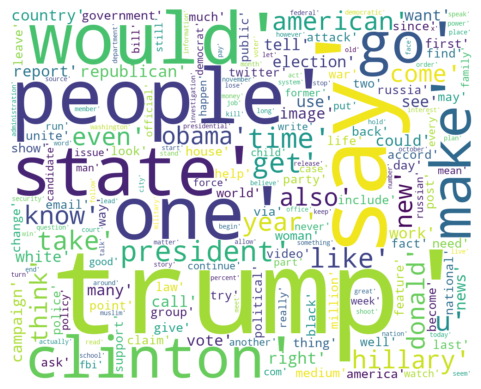

In [85]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=800).generate(fake_text_string)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud from text (real articles)

In [86]:
#create string with text from real articles 

real_text = textdata[(textdata.label ==0)]

real_text_string = " ".join(text for text in real_text.text.astype(str))



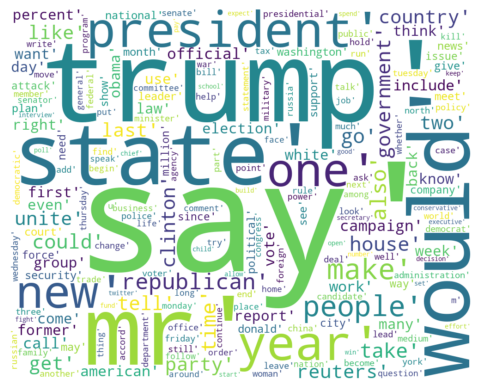

In [87]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=800).generate(real_text_string)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud from title (fake articles)

In [88]:
#create string with text from fake articles

fake_title = titledata[(titledata.label ==1)]

fake_title_string = " ".join(title for title in fake_title.title.astype(str))

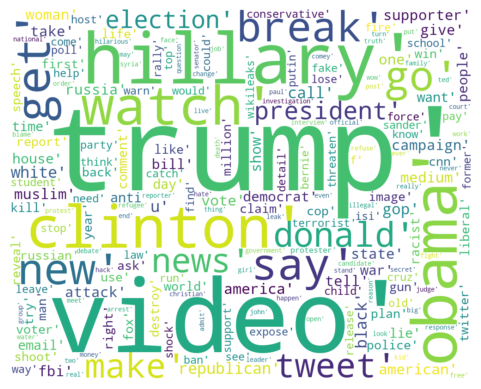

In [90]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=800).generate(fake_title_string)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud from title (real articles)

In [91]:
#create string with text from real articles 

real_title = titledata[(titledata.label ==0)]

real_title_string = " ".join(text for text in real_title.title.astype(str))



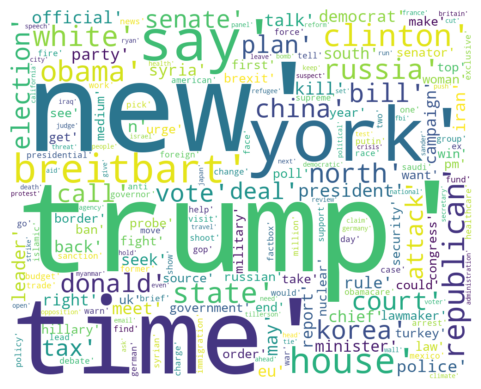

In [92]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=800).generate(real_title_string)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()